<a href="https://colab.research.google.com/github/TAEO2474/python-dev/blob/main/407_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%82%AC%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%88%84%EB%9D%BD%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# < 데이터 사전처리 기본과정>
- 1) 원본 데이터 로드 ✅ →
- 2) 결측치/누락값 확인 ✅ →
- 3) 결측치 처리(삭제 또는 대체) ✅ →
- 4) 중복 데이터 확인 및 제거 ✅ →
- 5) 이상치 처리 →
- 6)스케일링 & 인코딩 등 추가 작업 →
- 7) 모델 학습


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후  메뉴에서 런타임 > 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')   # 나눔 바른 고딕 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


# 결측 처리 전략 선택

| 조건               | 추천 방법                         |
| ---------------- | ----------------------------- |
| 결측 비율이 5% 미만     | 해당 행 삭제                       |
| 수치형 변수, 정규 분포 형태 | 평균 또는 중앙값                     |
| 범주형 변수, 불균형한 분포  | 최빈값 또는 Unknown                |
| 결측률 높고 중요 변수     | 예측 기반 보간(KNN 등)               |
| 머신러닝 모델용 입력      | SimpleImputer / KNNImputer 사용 |


# 누락 데이터 처리 (Missing Data Handling)

| 처리 방식       | 설명                   | 적용 조건/주의사항                 |
| ----------- | -------------------- | -------------------------- |
| 제거(drop)    | 결측치가 포함된 행 또는 열 삭제   | 결측치가 소수이고 삭제해도 정보 손실이 작을 때 |
| 대체(fill)    | 평균, 중앙값, 최빈값 등으로 채움  | 수치형 또는 범주형에 따라 적절히 선택      |
| 예측 기반 보간    | KNN, 회귀모델 등으로 결측값 예측 | 데이터 수가 충분하고 패턴이 명확할 때      |
| 특이값(모델로 처리) | 결측값 자체를 하나의 카테고리로 취급 | 트리 기반 모델 등에서는 효과적          |


## 데이터 생성


In [ ]:
import pandas as pd

# 예제 데이터
data = {
    'date': pd.date_range(start='2024-01-01', periods=5),
    'age': [25, 30, None, 22, 28],
    'gender': ['M', None, 'F', 'F', 'M'],
    'bmi': [23.5, 27.8, 30.2, None, 24.1],
    'temperature': [22.5, None,  23.0, None, 21.8]
}
df = pd.DataFrame(data)
df

,date,age,gender,bmi,temperature
0,2024-01-01,25.0,M,23.5,22.5
1,2024-01-02,30.0,None,27.8,NaN
2,2024-01-03,NaN,F,30.2,23.0
3,2024-01-04,22.0,F,NaN,NaN
4,2024-01-05,28.0,M,24.1,21.8


# Pandas DataFrame의 누락 데이터 확인 메서드

### 1. df.isnull()
- **설명**: `df.isnull()`은 DataFrame의 각 셀이 `NaN`(또는 `None`)인지 확인하여 `True`/`False`로 이루어진 동일한 크기의 DataFrame을 반환합니다.
- **`print(df.isnull())`**: DataFrame의 전체 내용이 문자열 형태로 출력됩니다. 큰 DataFrame의 경우, Pandas는 기본적으로 일부 행과 열만 표시하고 나머지는 생략(`...`)합니다.
- **`print()` 없이 `df.isnull()`**: Jupyter Notebook이나 인터프리터에서는 DataFrame이 HTML 테이블 형태로 예쁘게 렌더링되거나, `__repr__()` 메서드를 통해 전체 구조가 표시될 수 있습니다. 환경에 따라 출력이 더 자세하거나 덜 자세할 수 있습니다.

### 2. df.isnull().sum()
- **설명**: `df.isnull().sum()`은 각 열의 `NaN` 개수를 합산하여 Series 객체를 반환합니다.
- **`print(df.isnull().sum())`**: Series의 각 열 이름과 해당 열의 `NaN` 개수가 깔끔한 문자열 형태로 출력됩니다.
- **`print()` 없이 `df.isnull().sum()`**: Jupyter Notebook에서는 Series가 테이블 형태로 렌더링되거나, `__repr__()`를 통해 문자열로 표시됩니다. 출력 내용은 거의 동일하지만, 환경에 따라 서식이 약간 다를 수 있습니다.

### 3. df.isnull().mean()
- **설명**: `df.isnull().mean()`은 각 열의 `NaN` 비율(0~1 사이)을 계산하여 Series 객체를 반환합니다.
- **`print(df.isnull().mean())`**: 비율이 문자열로 출력되며, 소수점 자릿수가 Pandas 기본 설정에 따라 표시됩니다.
- **`print()` 없이 `df.isnull().mean()`**: Jupyter Notebook에서는 HTML 테이블로 렌더링되거나, `__repr__()`를 통해 소수점 자릿수가 더 길게 표시될 수 있습니다.

### 4. df.notnull()
- **설명**: `df.notnull()`은 `df.isnull()`의 반대로, 관측값이 있으면 `True`, `NaN`이면 `False`인 DataFrame을 반환합니다.
- **`print(df.notnull())`**: `df.isnull()`과 유사하게, DataFrame이 문자열로 출력되며, 큰 DataFrame은 생략될 수 있습니다.
- **`print()` 없이 `df.notnull()`**: Jupyter Notebook에서는 HTML 테이블로 렌더링되거나, `__repr__()`로 표시됩니다.

In [ ]:
# 누락 데이터 개수 확인
#print(df.isnull())   # null이 있으면 True, 관측값이 있으면 False
print(df.isnull().sum())

#누락 데이터 비율 확인
print(df.isnull().mean())

# 관측값 확인
#관측값 : 데이터프레임(df)의 각 셀에 실제 데이터가 존재하는 값
print(df.notnull()) #즉, 누락(Null,None)이 있으면 True, null이면 False

date           0
age            1
gender         1
bmi            1
temperature    2
dtype: int64
date           0.0
age            0.2
gender         0.2
bmi            0.2
temperature    0.4
dtype: float64
   date    age  gender    bmi  temperature
0  True   True    True   True         True
1  True   True   False   True        False
2  True  False    True   True         True
3  True   True    True  False        False
4  True   True    True   True         True


In [ ]:
#!pip install missingno

In [ ]:
!pip list | grep missingno

missingno                             0.5.2


# msno.matrix() 함수
- 라이브러리: missingno (결측값[누락된데이터, 결여된 데이터] 시각화를 위한 Python 라이브러리)
- 기능: 데이터프레임의 각 열에 대해 결측값이 있는 위치를 시각적으로 표시합니다.
- 출력: 행과 열로 구성된 매트릭스 형태의 플롯을 생성하며, 결측값은 흰색(또는 빈 공간)으로, 관측값(실제 데이터)은 검은색(또는 채워진 공간)으로 표시됩니다.

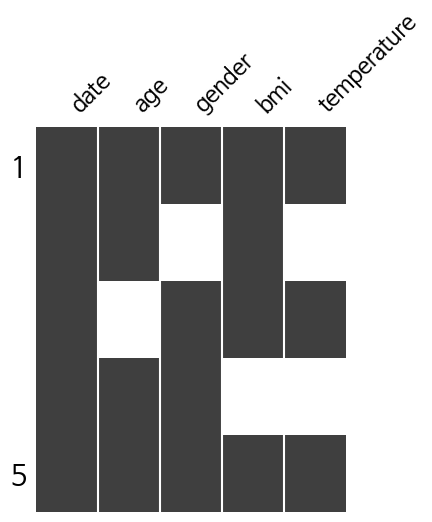

In [ ]:
import missingno as msno

# 결측값(누락값) 매트릭트 형태로 시각화
msno.matrix(df, figsize=(4,5), sparkline=False)
plt.show()


# 결측값(흰색): 데이터가 없는 경우(NaN, None). 즉, "결여된 측정값".
# 관측 데이터(검은색): 실제 데이터가 있는 경우(숫자, 문자열 등).

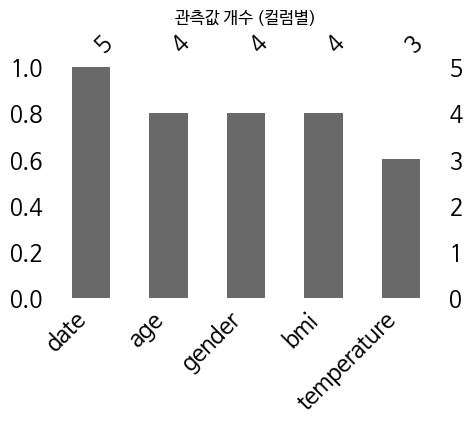

In [ ]:
# 컬럼별 결측치 개수 시각화
msno.bar(df, figsize=(5,3))
plt.title("관측값 개수 (컬럼별)")
plt.show()

# 검은색: 결측(누락) 데이터
# 오른쪽 수치는 non-null 개수

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


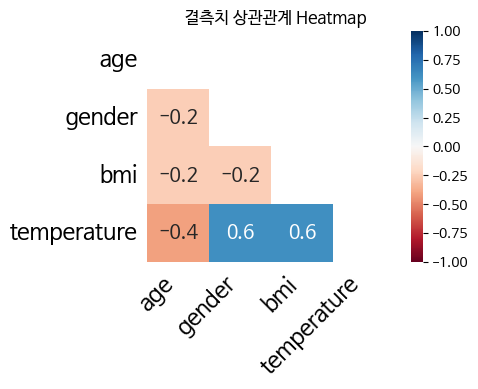

In [ ]:
# 결측치 간 상관관계 분석
msno.heatmap(df, figsize=(4,3))
plt.title("🔥 결측치 상관관계 Heatmap")
plt.show()

# NaN이 같이 발생하는 정도 (null-null correlation) 를 나타냄.
# 1에 가까우면 같은 행에서 동시에 결측이 많이 발생한다는 의미.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


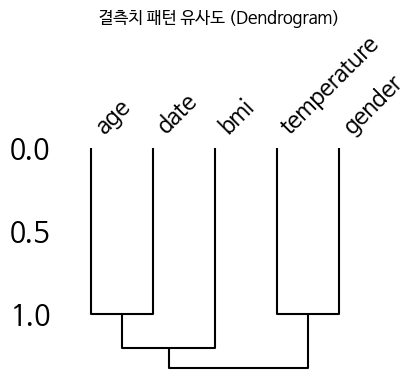

In [ ]:
# 결측치 컬럼 간 유사도 계층 구조
msno.dendrogram(df, figsize=(4,3))
plt.title("🌲 결측치 패턴 유사도 (Dendrogram)")
plt.show()

# 결측 패턴이 유사한 변수끼리 묶어주는 트리 형태 시각화
# 데이터가 클수록 더 유용함

## 누락 데이터 (결측데이터)

| 조건                       | 추천 방식               |
| ------------------------ | ------------------- |
| 연속된 NaN이 많은 경우           | 평균, 예측 기반 고려        |
| 순서가 중요하지 않은 경우           | 다른 방식(평균, 중앙값 등) 선호 |
| 센서/시계열 데이터               | `ffill` or `bfill`  |
| 정해진 순서가 있는 데이터 (예: 타임라인) | `ffill`, `bfill`    |

In [ ]:
df_1 = df.copy()
print(df_1)

# ① 수치형은 평균값, 중앙값으로 대체
df_1['age'] = df_1['age'].fillna(df_1['age'].mean())   # 평균값 대체
df_1['bmi'] = df_1['bmi'].fillna(df_1['bmi'].median()) # 중앙값 대체


# ② 범주형은 최빈값( 자료에 가장 많이 등장한 값)으로 대체
df_1['gender'] = df_1['gender'].fillna(df_1['gender'].mode()[0])
df_1


        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0   None  27.8          NaN
2 2024-01-03   NaN      F  30.2         23.0
3 2024-01-04  22.0      F   NaN          NaN
4 2024-01-05  28.0      M  24.1         21.8


,date,age,gender,bmi,temperature
0,2024-01-01,25.00,M,23.50,22.5
1,2024-01-02,30.00,F,27.80,NaN
2,2024-01-03,26.25,F,30.20,23.0
3,2024-01-04,22.00,F,25.95,NaN
4,2024-01-05,28.00,M,24.10,21.8


In [ ]:
df_2 = df.copy()
print(df_2)

# ③ 앞의 값으로 채우기 (forward fill)
#df_ffill = df_2.fillna(method='ffill')  # deprecated
#df_ffill
df_ffill = df_2.ffill()
print("\nForward Fill 처리:")
print(df_ffill)

df_3 = df.copy()
# ④ 뒤의 값으로 채우기 (backward fill)
#df_bfill = df_3.fillna(method='bfill')
df_bfill = df_3.bfill()
print("\nBackward Fill 처리:")
print(df_bfill)

        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0   None  27.8          NaN
2 2024-01-03   NaN      F  30.2         23.0
3 2024-01-04  22.0      F   NaN          NaN
4 2024-01-05  28.0      M  24.1         21.8

Forward Fill 처리:
        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0      M  27.8         22.5
2 2024-01-03  30.0      F  30.2         23.0
3 2024-01-04  22.0      F  30.2         23.0
4 2024-01-05  28.0      M  24.1         21.8

Backward Fill 처리:
        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0      F  27.8         23.0
2 2024-01-03  22.0      F  30.2         23.0
3 2024-01-04  22.0      F  24.1         21.8
4 2024-01-05  28.0      M  24.1         21.8


In [ ]:
from sklearn.impute import KNNImputer

df_4 = df.copy()
print(df_4.info())
print(df)

# 수치형 변수만 선택
numeric_df = df_4[['age', 'bmi']]

# ⑤ KNN 기반 대체 (k=2) -> 머신러닝에서 많이 사용
imputer = KNNImputer(n_neighbors=2)
df_knn = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)
print(df_knn)
# "numeric_df의 수치형 데이터에서 결측치를 KNN 방식(n=2)으로 채우기 위해 Imputer를 학습시키고,
# 그걸 기반으로 데이터를 채운 결과를 새로운 데이터프레임(df_knn)에 저장한다."


# 원래 df_4에 다시 대입
# 원래 df에 다시 대입
df_4[['age', 'bmi']] = df_knn
df_4



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5 non-null      datetime64[ns]
 1   age          4 non-null      float64       
 2   gender       4 non-null      object        
 3   bmi          4 non-null      float64       
 4   temperature  3 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 332.0+ bytes
None
        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0   None  27.8          NaN
2 2024-01-03   NaN      F  30.2         23.0
3 2024-01-04  22.0      F   NaN          NaN
4 2024-01-05  28.0      M  24.1         21.8
    age   bmi
0  25.0  23.5
1  30.0  27.8
2  29.0  30.2
3  22.0  23.8
4  28.0  24.1


,date,age,gender,bmi,temperature
0,2024-01-01,25.0,M,23.5,22.5
1,2024-01-02,30.0,None,27.8,NaN
2,2024-01-03,29.0,F,30.2,23.0
3,2024-01-04,22.0,F,23.8,NaN
4,2024-01-05,28.0,M,24.1,21.8


 age과 bmi의 결측값(누락값)을 잡아내서 변경할 예정
 - temperature 무시
```
   age   bmi   temperature
0  25.0  23.5      22.5
1  30.0  27.8       NaN   ← NaN 있음 → 비슷한 행 2개 찾음
2   NaN  30.2      23.0   ← NaN 있음 → 이웃 평균으로 age 채움
3  22.0   NaN       NaN   ← NaN 2개 → 이웃 2개로 모두 추정
4  28.0  24.1      21.8
```
```
     age   bmi
0  25.0  23.50
1  30.0  27.80
2  26.5  30.20  ← age: (25+28)/2 = 26.5
3  22.0  25.80  ← bmi: (23.5+28.1)/2 = 25.80 정도
4  28.0  24.10
```

df_4[['age', 'bmi']] = df_knn으로 채운 후, df_4를 출력하면 이렇게 됩니다:
```
        date   age gender   bmi  temperature
0 2024-01-01 25.0      M  23.5        22.5
1 2024-01-02 30.0   None 27.8         NaN
2 2024-01-03 26.5      F 30.2        23.0
3 2024-01-04 22.0      F 25.8         NaN
4 2024-01-05 28.0      M 24.1        21.8
```

| 용어                | 설명                           |
| ----------------- | ---------------------------- |
| `fit()`           | 이웃을 어떻게 찾을지 학습 (거리 기반 구조 생성) |
| `transform()`     | 학습한 방식으로 결측값 채움              |
| `fit_transform()` | 한 줄로 학습 + 적용                 |
| `n_neighbors`     | 결측을 채울 때 참고할 유사 행의 수         |
| `KNNImputer`      | 비슷한 행(K개)을 찾아 평균값으로 결측값 채움   |


In [ ]:
import numpy as np

df_5 = df.copy()
print(df_5)

# 수치형 컬럼만 추출 (아래설명)
numeric_cols = df_5.select_dtypes(include=[np.number])

# 선형 보간으로 누락값 채우기 (시간 흐름을 고려함)
df_linear = numeric_cols.interpolate(method='linear')
df_linear

        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0   None  27.8          NaN
2 2024-01-03   NaN      F  30.2         23.0
3 2024-01-04  22.0      F   NaN          NaN
4 2024-01-05  28.0      M  24.1         21.8


,age,bmi,temperature
0,25.0,23.50,22.50
1,30.0,27.80,22.75
2,26.0,30.20,23.00
3,22.0,27.15,22.40
4,28.0,24.10,21.80


1. select_dtypes(include=[np.number])
 - 데이터프레임에서 숫자형 컬럼들만 선택

 - 예를 들어 age, bmi, temperature 같은 열만 추출.

2. interpolate(method='linear')
 - *선형 보간법(linear interpolation)**은 결측값을
앞뒤 값들의 직선상에 있다고 가정해, 그 사이의 값을 채워주는 방법

 - 특히 *시간 흐름(time series)**이나 순서가 있는 데이터에서 자연스럽게 값을 채우는데 좋음


In [ ]:
df_6 = df.copy()
print(df_6)

# method='time' 은 시계열(time series) 보간 방식은 인덱스가 DatetimeIndex일 때만 작동한다.
# 'date'를 인덱스로 설정
df_6  = df_6.set_index('date')

# 수치형 컬럼만 추출
numeric_cols = df_6.select_dtypes(include=[np.number])

# 시간 간격 고려한 보간 (예: 센서 데이터)
df_time = numeric_cols.interpolate(method='time')
df_time

        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0   None  27.8          NaN
2 2024-01-03   NaN      F  30.2         23.0
3 2024-01-04  22.0      F   NaN          NaN
4 2024-01-05  28.0      M  24.1         21.8


,age,bmi,temperature
date,,,
2024-01-01,25.0,23.50,22.50
2024-01-02,30.0,27.80,22.75
2024-01-03,26.0,30.20,23.00
2024-01-04,22.0,27.15,22.40
2024-01-05,28.0,24.10,21.80


# 누락데이터 제거
 - ① 결측치가 포함된 행 제거
 - ② 특정 열만 제거

In [ ]:
df_7 = df.copy()
print(df_7)

# ① 결측값 포함된 행 제거
df_drop_rows = df_7.dropna()   # df_7.dropna(inplace=True)
print(df_drop_rows)
print(df_7)

df_7.dropna(inplace=True)
print(df_7)

        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0   None  27.8          NaN
2 2024-01-03   NaN      F  30.2         23.0
3 2024-01-04  22.0      F   NaN          NaN
4 2024-01-05  28.0      M  24.1         21.8
        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
4 2024-01-05  28.0      M  24.1         21.8
        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0   None  27.8          NaN
2 2024-01-03   NaN      F  30.2         23.0
3 2024-01-04  22.0      F   NaN          NaN
4 2024-01-05  28.0      M  24.1         21.8
        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
4 2024-01-05  28.0      M  24.1         21.8


In [ ]:
df_8 = df.copy()
print(df_8)

# ② 특정 열만 제거
df_drop_column = df_8.drop(columns=['gender'])  #  df_8.drop(columns=['gender'], inplace=True)
print(df_drop_column)
print(df_8)

df_8.drop(columns=['gender'], inplace=True)
print(df_8)

        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0   None  27.8          NaN
2 2024-01-03   NaN      F  30.2         23.0
3 2024-01-04  22.0      F   NaN          NaN
4 2024-01-05  28.0      M  24.1         21.8
        date   age   bmi  temperature
0 2024-01-01  25.0  23.5         22.5
1 2024-01-02  30.0  27.8          NaN
2 2024-01-03   NaN  30.2         23.0
3 2024-01-04  22.0   NaN          NaN
4 2024-01-05  28.0  24.1         21.8
        date   age gender   bmi  temperature
0 2024-01-01  25.0      M  23.5         22.5
1 2024-01-02  30.0   None  27.8          NaN
2 2024-01-03   NaN      F  30.2         23.0
3 2024-01-04  22.0      F   NaN          NaN
4 2024-01-05  28.0      M  24.1         21.8
        date   age   bmi  temperature
0 2024-01-01  25.0  23.5         22.5
1 2024-01-02  30.0  27.8          NaN
2 2024-01-03   NaN  30.2         23.0
3 2024-01-04  22.0   NaN          NaN
4 2024-01-05  28.0  24.1         21.8


# 중복데이터 제거
- ①  중복 여부 확인
- ② 중복 행 제거 (전체 열 기준)

In [ ]:
# 데이터 생성
data = {
    'Name': ['Alice', 'Bob', 'Alice', 'David', 'Eve', 'Bob'],
    'Age': [25, 30, 25, 35, 40, 30],
    'City': ['Seoul', 'Busan', 'Seoul', 'Incheon', 'Seoul', 'Busan']
}

df = pd.DataFrame(data)
print("원본 데이터:\n", df)

# ①  중복 여부 확인
print("중복 여부 (전체 행 기준):")
print(df.duplicated())



# ② 중복 행 제거 (전체 열 기준)
df_no_duplicates = df.drop_duplicates()  # df.drop_duplicates(inplace=True)
print("중복 제거 결과 (전체 열 기준):\n", df_no_duplicates)
print(df)

# ③ 특정 열 기준으로 중복 제거 (예: Name 기준)
df_name_unique = df.drop_duplicates(subset=['Name'])
print("\nName 기준 중복 제거 (첫 번째만 남김):\n", df_name_unique)

# ④ 마지막 항목을 남기고 중복 제거 (keep='last')
df_name_last = df.drop_duplicates(subset=['Name'], keep='last')
print("\n이름 기준 중복 제거 (마지막만 남김):\n", df_name_last)

# ⑤ 중복된 행만 필터링
df_duplicates_only = df[df.duplicated()]
print("\n중복된 행만 추출:\n", df_duplicates_only)


원본 데이터:
     Name  Age     City
0  Alice   25    Seoul
1    Bob   30    Busan
2  Alice   25    Seoul
3  David   35  Incheon
4    Eve   40    Seoul
5    Bob   30    Busan
중복 여부 (전체 행 기준):
0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool
중복 제거 결과 (전체 열 기준):
     Name  Age     City
0  Alice   25    Seoul
1    Bob   30    Busan
3  David   35  Incheon
4    Eve   40    Seoul
    Name  Age     City
0  Alice   25    Seoul
1    Bob   30    Busan
2  Alice   25    Seoul
3  David   35  Incheon
4    Eve   40    Seoul
5    Bob   30    Busan

Name 기준 중복 제거 (첫 번째만 남김):
     Name  Age     City
0  Alice   25    Seoul
1    Bob   30    Busan
3  David   35  Incheon
4    Eve   40    Seoul

이름 기준 중복 제거 (마지막만 남김):
     Name  Age     City
2  Alice   25    Seoul
3  David   35  Incheon
4    Eve   40    Seoul
5    Bob   30    Busan

중복된 행만 추출:
     Name  Age   City
2  Alice   25  Seoul
5    Bob   30  Busan
